### Serverial questions for CNN!
1. Why LeNet use Sigmoid after a conv layer?
2. How `xavier_uniform_` works?
3. Why I add a softmax layer at the end of NN will bring vanishing to gradients?
4. Why cross entropy loss seems flatuated between epochs, but finally we could get a good predict resuts through NN.
5. If we didn't apply softmax in NN, how did the cross entropy calculation correct?

### TODO
modern CNN chapter not finished!

In [182]:
import torch
from torch import nn
from d2l import torch as d2l

In [183]:
def init_cnn(module):
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet(nn.Module):
    def __init__(self,num_classes=10):
        super().__init__()
        self.net=nn.Sequential(
            nn.LazyConv2d(6,kernel_size=5,padding=2),
            nn.ReLU(),
            #nn.Sigmoid(), # why sigmod after a conv?
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.LazyConv2d(16,kernel_size=5),
            nn.ReLU(),
            #nn.Sigmoid(), # ditto?
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Flatten(), # transform into a vector tensor
            nn.LazyLinear(120), #nn.Sigmoid(),
            nn.ReLU(),
            nn.LazyLinear(84), #nn.Sigmoid(),
            nn.ReLU(),
            nn.LazyLinear(num_classes))
            #, nn.Softmax()) # A softmax layer seems bring vanishing gradient, why?
        for layer in self.net:
            init_cnn(layer)

    def forward(self, X):
        return self.net(X)

    def layer_summary(self, X_shape):
        X = torch.randn(*X_shape)
        for layer in self.net:
            X = layer(X)
            print(layer.__class__.__name__, 'output shape:\t', X.shape)



In [184]:
model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
ReLU output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


In [185]:
print("\nParameters before optimizer step:")
for name, param in model.named_parameters():
    print(f"{name}:\n{param}")


Parameters before optimizer step:
net.0.weight:
Parameter containing:
tensor([[[[ 0.1998,  0.1447,  0.1259, -0.1863, -0.1392],
          [ 0.1057, -0.0025,  0.0058,  0.0104, -0.1202],
          [-0.1775, -0.1192, -0.1942, -0.1652,  0.0843],
          [ 0.0472, -0.1098,  0.0200,  0.0091,  0.0216],
          [-0.0026, -0.1252, -0.0540, -0.0497, -0.0269]]],


        [[[-0.0136,  0.1072,  0.0360,  0.0977,  0.0158],
          [-0.1646,  0.0032, -0.1896,  0.0333, -0.1228],
          [ 0.0697,  0.0122, -0.0455, -0.0239,  0.1205],
          [-0.1498, -0.1921, -0.1275,  0.1084,  0.0318],
          [ 0.0029, -0.1626, -0.1536,  0.0737, -0.0714]]],


        [[[ 0.1620,  0.1839,  0.0874, -0.0527,  0.0513],
          [-0.1766,  0.1929, -0.1526,  0.0223, -0.0545],
          [ 0.0666,  0.1645, -0.0168, -0.1833, -0.1296],
          [ 0.0463,  0.1308,  0.0794,  0.0075,  0.0854],
          [ 0.0217,  0.1716,  0.1227,  0.0990,  0.0937]]],


        [[[ 0.0374, -0.0673, -0.0585, -0.0727, -0.1510],
     

In [186]:
for X, y in train_iter:
    print(model(X))
    print(model(X).shape)
    break

tensor([[ 0.0720, -0.0705, -0.0606,  ..., -0.0681, -0.0590,  0.0435],
        [ 0.0619, -0.0649, -0.0620,  ..., -0.0755, -0.0550,  0.0497],
        [ 0.0583, -0.0645, -0.0574,  ..., -0.0732, -0.0549,  0.0489],
        ...,
        [ 0.0589, -0.0645, -0.0647,  ..., -0.0742, -0.0503,  0.0507],
        [ 0.0601, -0.0667, -0.0659,  ..., -0.0772, -0.0498,  0.0486],
        [ 0.0741, -0.0704, -0.0528,  ..., -0.0693, -0.0541,  0.0498]],
       grad_fn=<AddmmBackward0>)
torch.Size([256, 10])


In [187]:
loss=nn.CrossEntropyLoss()
#optimizer=torch.optim.SGD(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.parameters()

<generator object Module.parameters at 0x7f83210f8820>

In [188]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [189]:
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss=0
    for X, y in train_iter:
        y_hat=model(X)
        #print("y_hat shape: ", y_hat.shape)
        #print("y shape: ", y.shape)
        y_true=torch.zeros(y_hat.shape)
        y_true[range(len(y_hat)), y] = 1
        #print(y_true)
        ls=loss(y_hat,y_true)
        #print("\nls is:")
        #print(ls)
        
        optimizer.zero_grad()
        #print("\nGradients before backward pass:")
        #for name, param in model.named_parameters():
        #    print(f"{name} gradients:\n{param.grad}")
        #    break
        ls.backward()
        #print("\nGradients after backward pass:")
        #for name, param in model.named_parameters():
        #    print(f"{name} gradients:\n{param.grad}")
        #    break
        optimizer.step()
        

        running_loss+=ls.item()
        #break
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {ls/len(train_iter):.4f}")

Epoch [1/10], Loss: 0.0007
Epoch [2/10], Loss: 0.0010
Epoch [3/10], Loss: 0.0010
Epoch [4/10], Loss: 0.0009
Epoch [5/10], Loss: 0.0010
Epoch [6/10], Loss: 0.0013
Epoch [7/10], Loss: 0.0015
Epoch [8/10], Loss: 0.0012
Epoch [9/10], Loss: 0.0011
Epoch [10/10], Loss: 0.0010


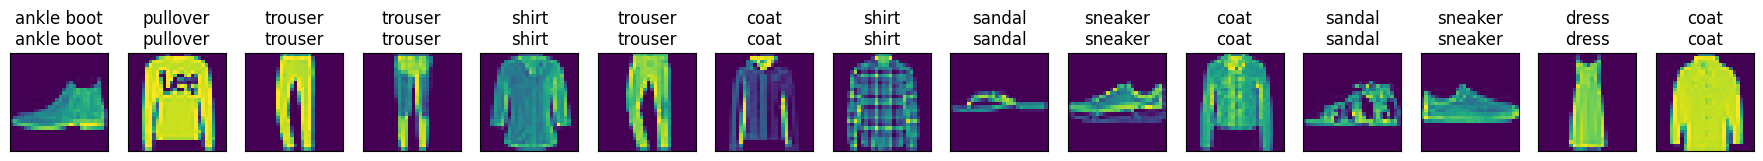

In [190]:
def predict(net, test_iter, n=15):  #@save
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(model(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict(model, test_iter)